<a href="https://colab.research.google.com/github/Tikakiku/MachineLearningTasks/blob/main/UTS/UTS_ML_%5BXGBoost_CClassification%5D_%5BTitanicDataset%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Nama : Ratika Dwi Anggraini
# NIM  : 1103201250
# Kelas : TK4406
# Pengolahan Data : Classification
# Dataset : Titanic Dataset
# Model : XGBoost

In [ ]:
# Import library pandas untuk manipulasi data
import pandas as pd
# Import library numpy untuk operasi numerik
import numpy as np
# Import library matplotlib.pyplot untuk visualisasi data
import matplotlib.pyplot as plt
# Import library seaborn untuk visualisasi data yang lebih cantik
import seaborn as sns
# Import library scikit-learn untuk pemodelan dan evaluasi
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, mean_absolute_error
# Import library XGBoost untuk pemodelan klasifikasi
import xgboost as xgb

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
# Baca dataset menggunakan Pandas dengan path sesuai dataset di Google Drive
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Titanic Dataset.csv")

Mounted at /content/drive


EDA

In [ ]:
# Menampilkan baris pertama dataset
print(data.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [ ]:
# Info dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


DATA VISUALIZATION

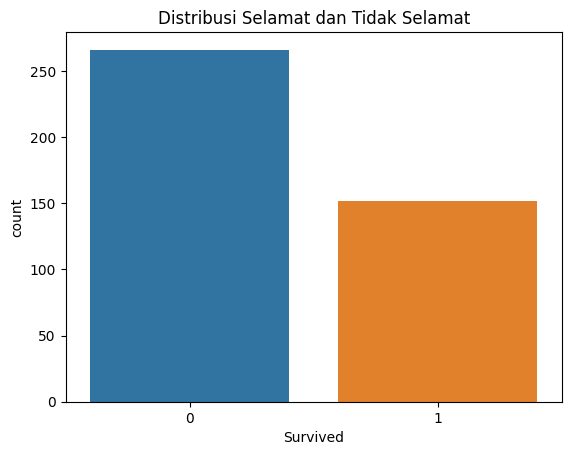

In [ ]:
# Visualisasi EDA
sns.countplot(x='Survived', data=data)
plt.title('Distribusi Selamat dan Tidak Selamat')
plt.show()

In [ ]:
# Mengisi nilai yang hilang dengan metode forward fill
# Untuk mengantisipasi data yang hilang memiliki tren atau pola temporal sehingga dapat  nilai yang hilang akan diisi dengan nilai yang terakhir kali muncul dalam kolom tersebut.
data.fillna(method='ffill', inplace=True)

In [ ]:
# Handle kolom kategorikal
# Digunakan untuk menghindari masalah multikolinearitas pada dataset
data = pd.get_dummies(data, columns=['Sex', 'Embarked', 'Name', 'Ticket', 'Cabin'], drop_first=True)

# Melihat data yang telah diperbarui
print(data.head())

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  \
0          892         0       3  34.5      0      0   7.8292         1   
1          893         1       3  47.0      1      0   7.0000         0   
2          894         0       2  62.0      0      0   9.6875         1   
3          895         0       3  27.0      0      0   8.6625         1   
4          896         1       3  22.0      1      1  12.2875         0   

   Embarked_Q  Embarked_S  ...  Cabin_E52  Cabin_E60  Cabin_F  Cabin_F E46  \
0           1           0  ...          0          0        0            0   
1           0           1  ...          0          0        0            0   
2           1           0  ...          0          0        0            0   
3           0           1  ...          0          0        0            0   
4           0           1  ...          0          0        0            0   

   Cabin_F E57  Cabin_F G63  Cabin_F2  Cabin_F33  Cabin_F4  Cabin_G6  
0        

In [ ]:
# Pisahkan fitur dan label
# Memudahkan proses pemodelan dan evaluasi pada dataset
X = data.drop('Survived', axis=1)
y = data['Survived']

# Memisahkan dataset menjadi data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

TRAINING DATA

In [ ]:
# Inisialisasi model XGBoost
model = xgb.XGBClassifier()

# Melatih model pada data training
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

EVALUATING DATA

In [ ]:
# Melakukan prediksi pada data test
y_pred = model.predict(X_test)

# Evaluasi performa model menggunakan accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


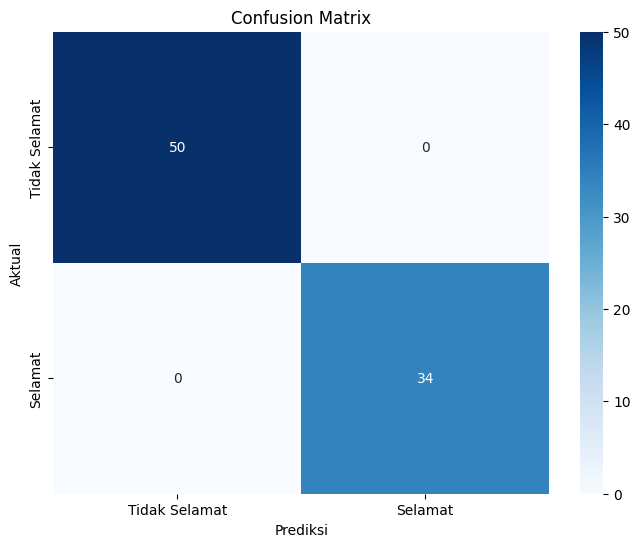

In [ ]:
# Confusion matrix
# Untuk mengidentifikasi dan mengukur jenis kesalahan yang dilakukan oleh model.
cm = confusion_matrix(y_test, y_pred)
# Visualisasi confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Selamat', 'Selamat'],
            yticklabels=['Tidak Selamat', 'Selamat'])
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [ ]:
# Menampilkan Classification report
print('Classification Report:')
# Menghasilkan laporan klasifikasi
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



INPUTING NEW DATA

In [ ]:
# Buat data dummy untuk prediksi
new_data = pd.DataFrame({
    'Pclass': [3],
    'Age': [25],
    'SibSp': [1],
    'Parch': [0],
    'Fare': [10],
    'Sex_male': [1],
    'Embarked_Q': [0],
    'Embarked_S': [1],
    'Name_Mr': [1],
    'Ticket_A': [0],
    'Cabin_B': [0]
})

In [ ]:
# Menyesuaikan kolom-kolom data input baru dengan X_train.columns
new_data = new_data.reindex(columns=X_train.columns, fill_value=0)

# Melakukan prediksi menggunakan model yang telah dilatih
prediction = model.predict(new_data)

# Menampilkan hasil prediksi
print("Predicted Survived:", prediction)

Predicted Survived: [0]
